In [1]:
import torch
from torch.nn import ReLU

from PIL import Image
from guided_backprop import GuidedBackprop

from torchvision.transforms import ToTensor

from misc_functions import (get_example_params,
                            convert_to_grayscale,
                            save_gradient_images,
                            get_positive_negative_saliency)
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


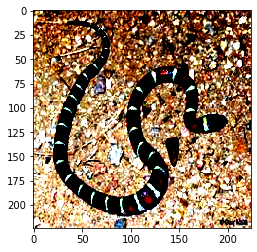

In [50]:
plt.imshow(prep_img[0].permute(1,2,0))


In [49]:
prep_img.requires_grad = False

In [52]:
prep_img.requires_grad = True

In [2]:
target_example = 0  # Snake
(original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
    get_example_params(target_example)

In [9]:
prep_img.shape

torch.Size([1, 3, 224, 224])

In [20]:
ToTensor()(original_image).shape

torch.Size([3, 224, 224])

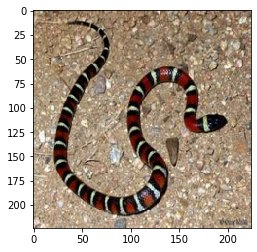

In [22]:
plt.imshow(ToTensor()(original_image).permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


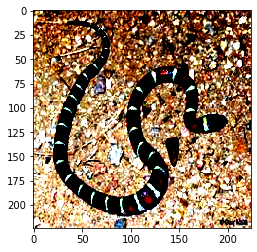

In [17]:
plt.imshow(prep_img[0].detach().permute(1,2,0))


In [64]:
img_path="../../tinyimagenet/train/n01443537/images/n01443537_1.JPEG"
image = Image.open(img_path)
image = ToTensor()(image).unsqueeze(0)
image.requires_grad = True

In [65]:
prep_img = image

In [45]:
prep_img.require_grad

True

In [3]:
# Guided backprop
GBP = GuidedBackprop(pretrained_model)
# Get gradients
guided_grads = GBP.generate_gradients(prep_img, target_class)
# Save colored gradients
save_gradient_images(guided_grads, '_Guided_BP_color')
# Convert to grayscale
grayscale_guided_grads = convert_to_grayscale(guided_grads)
# Save grayscale gradients
save_gradient_images(grayscale_guided_grads, 'Fish_Guided_BP_gray')
# Positive and negative saliency maps
pos_sal, neg_sal = get_positive_negative_saliency(guided_grads)
save_gradient_images(pos_sal, file_name_to_export + '_pos_sal')
save_gradient_images(neg_sal, file_name_to_export + '_neg_sal')
print('Guided backprop completed')

AttributeError: 'Tensor' object has no attribute 'save'

In [14]:
prep_img.shape

torch.Size([1, 3, 64, 64])

In [12]:
type(pretrained_model)

torchvision.models.alexnet.AlexNet